In [1]:
import pandas as pd

# Question 1: Python Programming (10 marks)

#### 1a) Most common characters (5 marks)

Given a string s, your task is to find the 5 most common characters and their occurence counts.

*   Sort in order of descending occurence counts
*   For characters with the same occurence counts, sort alphabetically
*   Return the output as a dictionary
*   Note: Only consider letters in the alphabet. The same letter in lower or uppercase are counted as the same character (standardise to lowercase)

<u>Example</u> <br>
Input: 'hippopotamus' <br>
Output: {'p': 3, 'o': 2, 'a': 1, 'h': 1, 'i': 1}

In [2]:
def qn_1a(s):
    word = s.lower()
    dictionary = {}
    while len(word) > 0:
        count = 0
        for i in range(len(word)):
            if word[i] == word[0]:
                count += 1
        dictionary[word[0]] = count
        word = word.replace(word[0], '')
    dictionary_alphabetical_order = dict(sorted(dictionary.items()))
    dictionary_descending_order = dict(sorted(dictionary_alphabetical_order.items(), key = lambda x: x[1], reverse = True))
    return dictionary_descending_order

#### 1b) Email Validation (5 marks)

Given a string s, your task is to determine if it is a valid email according to these format guidelines:

*   Has username@website.extension format type
*   username only contains alphabets, digits, dashes ('-') and underscores ('_')
*   website only contains alphabets and digits
*   extension only contains alphabets and is shorter than 3 characters
*   Entire email is in lowercase

Return True if the email is valid, and False otherwise. 

<u>Examples</u> <br>
Input: 'john_tan@hotmail.com' <br>
Output: True

Input: 'joyce@youtu_be.many' <br>
Output: False

In [3]:
def qn_1b(s):
    if s.count('@') == 1 and s.count('.') == 1:
        if s.find('@') < s.find('.'):
            if len(s[s.find('@') + 1: s.find('.')]) > 0 and s[s.find('@') + 1: s.find('.')].isalnum() == True and s[s.find('@') + 1: s.find('.')].islower() == True:
                if 0 < len(s[s.find('.') + 1 : len(s)]) <= 3 and s[s.find('.') + 1: len(s)].isalpha() == True and s[s.find('.') + 1: len(s)].islower() == True:
                    if len(s[0 : s.find('@')]) > 0:
                        for i in s[0 : s.find('@')]:
                            if ord(i) == 45 or 48 <= ord(i) <= 57 or ord(i) == 95 or 97 <= ord(i) <= 122:
                                continue
                            else:
                                return False
                        return True
                    else:
                        return False
                else:
                    return False
            else:
                return False
        else:
            return False
    else:
        return False

# Question 2: Data Wrangling (13 marks)

In [4]:
olympics = pd.read_csv("olympics.csv", encoding='latin-1')

In [5]:
olympics.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


#### 2a) Drop rows with missing values (1 mark)

In [6]:
new_olympics = olympics.dropna()

#### 2b) Find the top 10 countries which won the most medals in total from 1980 - 2000 (2 marks)

In [7]:
new_df_1 = new_olympics[new_olympics['Year'] >= 1980]
new_df_2 = new_df_1[new_df_1['Year'] <= 2000]
medal_by_country_1998_2000 = new_df_2['Country'].value_counts()
medal_by_country_1998_2000.head(10)

United States    1258
Soviet Union      736
Australia         468
Germany           441
East Germany      434
China             401
Romania           366
Italy             311
Korea, South      307
Russia            303
Name: Country, dtype: int64

#### 2c) Certain sports contain more than one discipline. E.g the "Aquatics" sport contains the "Diving", "Swimming", "Water polo" and "Synchronized S." disciplines. For such sports with more than one discipline, find the top 5 athletes with the most number of medals. Which countries are they from? (5 marks)

In [8]:
sport_discipline = new_olympics.groupby(['Sport', 'Discipline'])
sport_discipline.first() # Sports with more than one disciplines are Aquatics, Canoe / Kayak, Cycling, Equestrian, Gymnastics, Volleyball, and Wrestling
sport_more_than_one_discipline = new_olympics[new_olympics['Sport'].isin(['Aquatics', 'Canoe / Kayak', 'Cycling', 'Equestrian', 'Gymnastics', 'Volleyball', 'Wrestling'])]
medal_by_athlete = sport_more_than_one_discipline[['Athlete', 'Country']].groupby(['Athlete', 'Country'])['Athlete'].count().nlargest(5)
medal_by_athlete

Athlete             Country      
PHELPS, Michael     United States    16
ANDRIANOV, Nikolay  Soviet Union     12
NEMOV, Alexei       Russia           12
THOMPSON, Jenny     United States    12
TORRES, Dara        United States    12
Name: Athlete, dtype: int64

#### 2d) Certain events were discontinued throughout the years. E.g the "+ 100kg (super heavyweight) event appeared in 1984 but did not appear in 2008. Find all events which were discontinued. (5 marks)

Note: Events are considered to be discontinued if they weren't in the 2008 Olympics. 

In [9]:
all_events = new_olympics['Event'].unique()
new_olympics_2008 = new_olympics[new_olympics['Year'] == 2008]
all_events_2008 = new_olympics_2008['Event'].unique()
discontinued_events = set(all_events) - set(all_events_2008)
discontinued_events


{'+ 100kg (super heavyweight)',
 '+ 108kg, total (super heavyweight)',
 '+ 110kg, total (super heavyweight)',
 '+ 72kg (heavyweight)',
 '+ 81kg (heavyweight)',
 '+ 93kg (heavyweight)',
 '+ 95kg (heavyweight)',
 '- 48kg (extra-lightweight)',
 '- 48kg (light-flyweight)',
 '- 52kg, total (flyweight)',
 '- 54kg, total (flyweight)',
 '- 63kg (lightweight)',
 '100 - 110kg, total (heavyweight)',
 '100 - 130kg (super heavyweight)',
 '10000m walk',
 '10m running target (30+30 shots)',
 '1km time trial',
 '3000m',
 '48 - 52kg (flyweight)',
 '48 - 54kg',
 '500m time trial',
 '50m running target (30+30 shots)',
 '52 - 56kg (lightweight)',
 '52 - 57kg (bantamweight)',
 '54 - 58kg',
 '54 - 59kg, total (bantamweight)',
 '56 - 60kg, total (featherweight)',
 '56 - 61kg (half-middleweight)',
 '56kg',
 '57 - 62kg (featherweight)',
 '58 - 63kg',
 '59 - 64kg, total (featherweight)',
 '60 - 63.5kg (light-welterweight)',
 '60 - 65kg (half-lightweight)',
 '60 - 67.5kg, total (lightweight)',
 '61 - 66kg (middl

# Question 3: Data Visualisation (10 marks)
#### Using the dataset, come up with 2 visualisations + one key insight from each visualisation (5 marks for each visualisation + insight)

Text(0.5, 1.0, "USA's Top 10 Sports With Greatest Medal Count Improvement Between the 2004 and 2008 Summer Olympics")

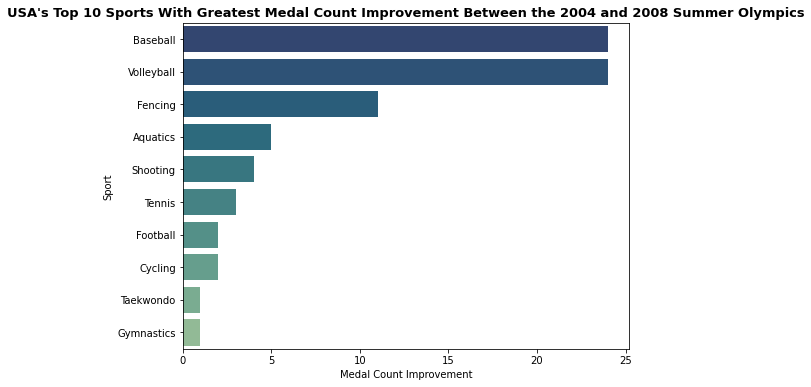

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization 1: USA's Top 10 Sports with Greatest Medal Count Improvement Between the 2004 and 2008 Summer Olympics

new_olympics_2004 = new_olympics[new_olympics['Year'] == 2004]
all_events_2004 = new_olympics_2004['Event'].unique()
new_olympics_2008 = new_olympics[new_olympics['Year'] == 2008]
all_events_2008 = new_olympics_2008['Event'].unique()
continued_events = set(all_events_2004).intersection(set(all_events_2008))
relevant_olympics_2004 = new_olympics_2004[new_olympics_2004['Event'].isin(continued_events)]
relevant_olympics_2008 = new_olympics_2008[new_olympics_2008['Event'].isin(continued_events)]
medal_by_sport_2004 = relevant_olympics_2004[relevant_olympics_2004['Country'] == 'United States'].groupby(['Sport'])['Medal'].count().reset_index(name = 'Count 2004')
medal_by_sport_2008 = relevant_olympics_2008[relevant_olympics_2008['Country'] == 'United States'].groupby(['Sport'])['Medal'].count().reset_index(name = 'Count 2008')
medal_by_sport = pd.merge(medal_by_sport_2004, medal_by_sport_2008, how = 'outer', on = 'Sport')
medal_by_sport = medal_by_sport.fillna(0)
medal_by_sport['Medal Count Improvement'] = medal_by_sport['Count 2008'] - medal_by_sport['Count 2004']
medal_by_sport_top_10 = medal_by_sport.sort_values('Medal Count Improvement', ascending = False).nlargest(10, 'Medal Count Improvement')

# Bar Plot
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(data = medal_by_sport_top_10, x = 'Medal Count Improvement', y = 'Sport', palette = 'crest_r').set_title("USA's Top 10 Sports With Greatest Medal Count Improvement Between the 2004 and 2008 Summer Olympics", fontdict = {'fontsize': 13, 'fontweight': 'bold'})

# Key Insight: The visualization shows the top Olympics sports categories that signify the greatest improvement in the 2008 Summer Olympics from the 2004 Summer Olympics by the US
# athletes. In particular, baseball, volleyball, fencing, aquatics, and shooting represent sports areas with the greatest success and return on the US's investment in its athletes.
# However, it is also crucial to note that some sports categories are team sports. As a result, a win in a team sport event will yield multiple medals to be accounted for in US's
# medal tally. It is also worth noting that some athletes were eligible to participate in multiple events within the same sports category, such as Michael Phelps in the various
# swimming events, which may lead to an overestimation of the sports category's success as it was hinged on a few prodigious athletes.

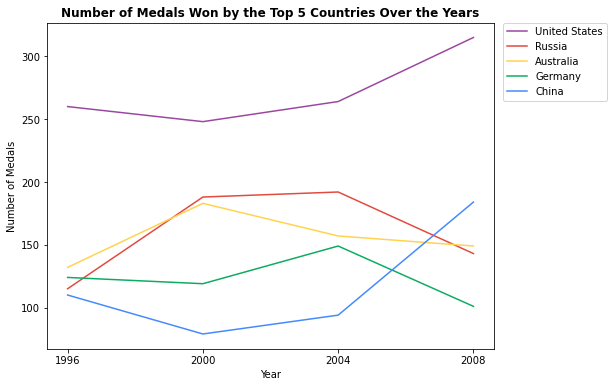

In [11]:
# Data Visualization 2: Number of Medals Won by the Top 5 Countries Over the Years

olympics_1996_onward = new_olympics[new_olympics['Year'] >= 1996]
medal_by_country_top_5 = olympics_1996_onward['Country'].value_counts().nlargest(5)
medal_by_country_top_5 # The top 5 countries by medal count from 1996 onward are United States, Russia, Australia, Germany, and China
medal_by_country_usa = olympics_1996_onward[olympics_1996_onward['Country'] == 'United States'].groupby(['Year'])['Medal'].count().reset_index(name = 'USA')
medal_by_country_rus = olympics_1996_onward[olympics_1996_onward['Country'] == 'Russia'].groupby(['Year'])['Medal'].count().reset_index(name = 'RUS')
medal_by_country_aus = olympics_1996_onward[olympics_1996_onward['Country'] == 'Australia'].groupby(['Year'])['Medal'].count().reset_index(name = 'AUS')
medal_by_country_ger = olympics_1996_onward[olympics_1996_onward['Country'] == 'Germany'].groupby(['Year'])['Medal'].count().reset_index(name = 'GER')
medal_by_country_chn = olympics_1996_onward[olympics_1996_onward['Country'] == 'China'].groupby(['Year'])['Medal'].count().reset_index(name = 'CHN')
data = pd.concat([medal_by_country_usa, medal_by_country_rus['RUS'], medal_by_country_aus['AUS'], medal_by_country_ger['GER'], medal_by_country_chn['CHN']], axis = 1)

# Line Plot
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(data['Year'], data['USA'], label = 'United States', color = '#9B479F')
plt.plot(data['Year'], data['RUS'], label = 'Russia', color = '#E04A3F')
plt.plot(data['Year'], data['AUS'], label = 'Australia', color = '#FFD34E')
plt.plot(data['Year'], data['GER'], label = 'Germany', color = '#0DAB62')
plt.plot(data['Year'], data['CHN'], label = 'China', color = '#448AFD')
plt.legend(bbox_to_anchor=(1.01, 1.015), loc='upper left')
plt.title('Number of Medals Won by the Top 5 Countries Over the Years', fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Year')
plt.ylabel('Number of Medals')
ax.xaxis.set_ticks(np.arange(1996, 2012, 4))
plt.show()

# Key Insight: The line plot depicts the trend of the number of medals won by the top 5 performing countries in the four most recent Summer Olympics contained in the data set.
# Only recent events from 1996 onward were included as Germany (previously East Germany and West Germany) was an official contender starting from 1992 and Russia (previously
# the Soviet Union) first competed in the Olympics in 1996. Among the top 5 countries, it can be observed that the US continued to not only defend its lead in the competition
# but also propelled ahead further with more medals won over the years. The US's Olympics success culminates in 315 medal wins in the 2008 Summer Olympics! In addition, in the
# 2008 Summer Olympics held in Beijing, China nearly doubled its number of medal wins from the previous Olympics. It may be interesting to investigate further whether being a
# host country during the Olympics played a part in boosting that country's competitive performance.